<a href="https://colab.research.google.com/github/ns-m/data_analysis/blob/main/Copy_of_Boston_sklearn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сначала мы импортируем необходимые библиотеки.

In [ ]:
!pip install witwidget --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import collections
import witwidget
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

Далее мы загрузим данные жилья из фреймворка scikit-learn.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
boston = pd.read_csv('/content/drive/MyDrive/edu.fa.ru/boston.csv')

In [ ]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
'''
#boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
feature_names = boston.feature_names
print(X.shape)
print(y.shape)
print(feature_names)

#boston.head()
'''

'\n#boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)\n\nfrom sklearn.datasets import load_boston\nboston = load_boston()\nX = boston.data\ny = boston.target\nfeature_names = boston.feature_names\nprint(X.shape)\nprint(y.shape)\nprint(feature_names)\n\n#boston.head()\n'

Посмотрим описание данных

In [ ]:
'''
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
'''

'\nfrom sklearn.datasets import load_boston\nboston_dataset = load_boston()\nboston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)\nboston.head()\n'

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB




*   CRIM: Per capita crime rate by town
*   ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
*   INDUS: Proportion of non-retail business acres per town
*   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX: Nitric oxide concentration (parts per 10 million)
*   RM: Average number of rooms per dwelling
*  AGE: Proportion of owner-occupied units built prior to 1940
*   DIS: Weighted distances to five Boston employment centers
*   RAD: Index of accessibility to radial highways
*   TAX: Full-value property tax rate per 10,000
*   PTRATIO  pupil-teacher ratio by town
*   B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT    % lower status of the population
*   MEDV     Median value of owner-occupied homes in $1000's




Цены на дом указаны переменной MEDV - наша целевая переменнаяа, остальные переменные это функции на основании которого мы будем прогнозировать стоимость дома.
Теперь мы загрузим данные в фрейм данных pandas, используя pd.DataFrame

Мы видим, что целевое значение MEDV отсутствует в данных. Мы создаем новый столбец целевых значений и добавляем его в фрейм данных.

In [ ]:
#boston['MEDV'] = boston_dataset.target

In [ ]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

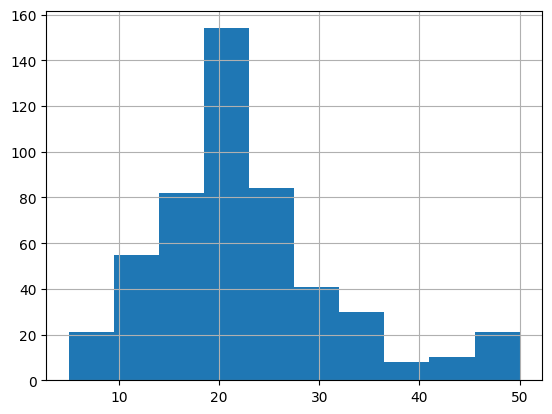

In [ ]:
boston.medv.hist()

In [ ]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
import plotly.express as px
px.histogram(boston, x='crim')

In [ ]:
px.box(boston)

In [ ]:
px.box(boston, x="crim", width=800, height=400)

In [ ]:
px.box(boston, x="zn", width=800, height=400)

In [ ]:
px.box(boston, x="indus", width=800, height=400)

In [ ]:
px.box(boston, x="chas", width=800, height=400)

In [ ]:
px.box(boston, x="nox", width=800, height=400)

In [ ]:
px.box(boston, x="rm", width=800, height=400)

In [ ]:
px.box(boston, x="age", width=800, height=400)

In [ ]:
px.box(boston, x="dis", width=800, height=400)

In [ ]:
px.box(boston, x="rad", width=800, height=400)

In [ ]:
px.box(boston, x="tax", width=800, height=400)

In [ ]:
px.box(boston, x="ptratio", width=800, height=400)

Запишем объект в файл со значениями, разделенными запятыми (csv).

In [ ]:
px.box(boston, x="black", width=800, height=400)

In [ ]:
px.box(boston, x="lstat", width=800, height=400)

In [ ]:
px.box(boston, x="medv", width=800, height=400)

In [ ]:
#boston.to_csv('boston.csv', sep = ',', index = False)

In [ ]:
#https://github.com/rosariomoscato/Rosario-Moscato-Lab/tree/main/Regression
# Pairplot
#sns.pairplot(boston)

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(boston)
fig.update_layout(
    title='Boston Data set',
    width=1600,
    height=1600,
)

#fig.show()

In [ ]:
corr = boston.corr()
px.imshow(corr,text_auto=True, aspect="auto")

In [ ]:
X = boston.drop('medv',axis=1)
y=boston['medv']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset: 80% vs 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# initiate the linear model and fit with data
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X_train, y_train)))

The R-squared value is: 0.7559 



In [ ]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(X.columns),
"Coef": [lm.intercept_] + list(lm.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   31.835164  intercept
1   -0.098793       crim
2    0.047503         zn
3    0.066949      indus
4    1.269541       chas
5  -15.469775        nox
6    4.319684         rm
7   -0.000980        age
8   -1.365980        dis
9    0.284522        rad
10  -0.012753        tax
11  -0.913488    ptratio
12   0.007226      black
13  -0.543790      lstat


In [ ]:
#%% check performance on test data
predicted = lm.predict(X_test)

In [ ]:
import numpy as np
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
mae

3.6601528186976715

In [ ]:
rmse

5.309659665032172

In [ ]:
rae

0.5286453811239555

In [ ]:
rse

0.3407533489645905

In [ ]:
print("The R-squared value is: {0:0.4f}".format(lm.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6592
Mean Absolute Error: 3.660153
Root Mean Squared Error: 5.309660
Relative Absolute Error: 0.528645
Relative Squared Error: 0.340753


# **RFECV**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
#from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
# initiate the linear model
lm = LinearRegression()

In [ ]:
# scale the features
min_mascaler =  preprocessing.MinMaxScaler()
scaled_minmax = min_mascaler.fit_transform(X_train)
scaled_minmaxdf = pd.DataFrame(scaled_minmax, columns=X.columns) #columns = feature_names)

In [ ]:
scaled_minmaxdf

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000323,0.95,0.081378,0.0,0.063992,0.831139,0.289362,0.360387,0.130435,0.070611,0.223404,0.989611,0.059007
1,0.109226,0.00,0.646628,0.0,0.730453,0.550930,0.970213,0.081771,1.000000,0.914122,0.808511,0.972414,0.504681
2,0.001493,0.00,0.131598,0.0,0.257202,0.389427,0.877660,0.130232,0.173913,0.208015,0.425532,1.000000,0.367660
3,0.001301,0.00,0.089076,0.0,0.123457,0.593338,0.551064,0.212286,0.043478,0.169847,0.574468,0.901861,0.139574
4,0.000082,0.75,0.129765,0.0,0.051440,0.450620,0.442553,0.561319,0.086957,0.538168,0.904255,1.000000,0.370780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.000849,0.00,0.089076,0.0,0.123457,0.824748,0.328723,0.212286,0.043478,0.169847,0.574468,0.991502,0.052199
400,0.054682,0.00,0.646628,0.0,0.471193,0.566034,0.931915,0.103692,1.000000,0.914122,0.808511,0.998260,0.480851
401,0.003876,0.00,0.253666,0.0,0.222222,0.480248,0.467021,0.324164,0.173913,0.190840,0.744681,1.000000,0.169362
402,0.103189,0.00,0.646628,0.0,0.648148,0.382455,1.000000,0.037536,1.000000,0.914122,0.808511,1.000000,0.620426


In [ ]:
max_abs_scaler =  MaxAbsScaler()
scaled_max_abs = max_abs_scaler.fit_transform(X_train)
scaled_max_abs_df = pd.DataFrame(scaled_max_abs, columns=X.columns)
scaled_max_abs_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000394,0.95,0.096611,0.0,0.477727,0.900057,0.332,0.422051,0.166667,0.315049,0.668182,0.989620,0.103029
1,0.109290,0.00,0.652487,0.0,0.849598,0.734212,0.972,0.170296,1.000000,0.936709,0.918182,0.972436,0.527853
2,0.001564,0.00,0.145999,0.0,0.585534,0.638625,0.885,0.214085,0.208333,0.416315,0.754545,1.000000,0.397242
3,0.001372,0.00,0.104182,0.0,0.510907,0.759312,0.578,0.288228,0.083333,0.388186,0.818182,0.901940,0.179827
4,0.000153,0.75,0.144196,0.0,0.470723,0.674842,0.476,0.603612,0.125000,0.659634,0.959091,1.000000,0.400216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.000920,0.00,0.104182,0.0,0.510907,0.896275,0.369,0.288228,0.083333,0.388186,0.818182,0.991509,0.096539
400,0.054750,0.00,0.652487,0.0,0.704937,0.743152,0.936,0.190104,1.000000,0.936709,0.918182,0.998262,0.505138
401,0.003946,0.00,0.266042,0.0,0.566016,0.692378,0.499,0.389321,0.208333,0.403657,0.890909,1.000000,0.208221
402,0.103253,0.00,0.652487,0.0,0.803674,0.634499,1.000,0.130326,1.000000,0.936709,0.918182,1.000000,0.638183


In [ ]:
std_scaler =  StandardScaler()
scaled_std = std_scaler.fit_transform(X_train)
scaled_std_df = pd.DataFrame(scaled_std, columns=X.columns)
scaled_std_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.401149,3.653859,-1.226095,-0.245698,-1.199016,2.231987,-1.278274,0.623686,-0.636934,-1.095990,-1.753696,0.388482,-1.266398
1,0.702723,-0.486534,0.995482,-0.245698,1.587329,0.176596,1.008537,-0.806000,1.675027,1.530409,0.808919,0.313998,0.940407
2,-0.389296,-0.486534,-1.028718,-0.245698,-0.391243,-1.008059,0.697674,-0.557330,-0.521336,-0.668160,-0.868429,0.433478,0.261930
3,-0.391244,-0.486534,-1.195840,-0.245698,-0.950404,0.487675,-0.399281,-0.136278,-0.868130,-0.787002,-0.216127,0.008419,-0.867459
4,-0.403599,2.782197,-1.035921,-0.245698,-1.251491,-0.559197,-0.763742,1.654751,-0.752532,0.359819,1.228256,0.433478,0.277382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.395821,-0.486534,-1.195840,-0.245698,-0.950404,2.185112,-1.146068,-0.136278,-0.868130,-0.787002,-0.216127,0.396673,-1.300111
400,0.149849,-0.486534,0.995482,-0.245698,0.503416,0.287391,0.879904,-0.693513,1.675027,1.530409,0.808919,0.425942,0.822411
401,-0.365143,-0.486534,-0.548961,-0.245698,-0.537485,-0.341868,-0.681559,0.437816,-0.521336,-0.721639,0.529361,0.433478,-0.719964
402,0.641524,-0.486534,0.995482,-0.245698,1.243229,-1.059195,1.108585,-1.032987,1.675027,1.530409,0.808919,0.433478,1.513530


In [ ]:
robust_scaler =  RobustScaler()
scaled_rob = robust_scaler.fit_transform(X_train)
scaled_rob_df = pd.DataFrame(scaled_rob, columns=X.columns)
scaled_rob_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.060466,7.6,-0.540478,0.0,-0.708721,2.266209,-0.912353,0.667919,-0.05,-0.273902,-1.553571,0.041116,-0.772636
1,2.630959,0.0,0.648419,0.0,1.174419,0.280617,0.399795,-0.342983,0.95,0.868217,0.410714,-0.298779,0.807847
2,-0.031565,0.0,-0.434850,0.0,-0.162791,-0.863808,0.221425,-0.167154,0.00,-0.087855,-0.875000,0.246449,0.321932
3,-0.036315,0.0,-0.524287,0.0,-0.540698,0.581132,-0.407996,0.130564,-0.15,-0.139535,-0.375000,-1.693247,-0.486922
4,-0.066438,6.0,-0.438705,0.0,-0.744186,-0.430189,-0.617119,1.396965,-0.10,0.359173,0.732143,0.246449,0.332998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.047474,0.0,-0.524287,0.0,-0.540698,2.220926,-0.836494,0.130564,-0.15,-0.139535,-0.375000,0.078495,-0.796781
400,1.282960,0.0,0.648419,0.0,0.441860,0.387650,0.325987,-0.263446,0.95,0.868217,0.410714,0.212061,0.723340
401,0.027324,0.0,-0.178103,0.0,-0.261628,-0.220240,-0.569964,0.536495,0.00,-0.111111,0.196429,0.246449,-0.381288
402,2.481747,0.0,0.648419,0.0,0.941860,-0.913208,0.457201,-0.503481,0.95,0.868217,0.410714,0.246449,1.218310


In [ ]:
normalizer_scaler =  Normalizer()
scaled_normal = normalizer_scaler.fit_transform(X_train)
scaled_normal_df = pd.DataFrame(scaled_normal, columns=X.columns)
scaled_normal_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000076,0.204920,0.005781,0.0,0.000898,0.016939,0.071614,0.011040,0.008628,0.483179,0.031709,0.847246,0.008218
1,0.012514,0.000000,0.023293,0.0,0.000952,0.008244,0.125089,0.002658,0.030886,0.857091,0.025996,0.496701,0.025121
2,0.000276,0.000000,0.008043,0.0,0.001013,0.011066,0.175757,0.005156,0.009930,0.587843,0.032967,0.788225,0.029174
3,0.000268,0.000000,0.006335,0.0,0.000975,0.014523,0.126703,0.007662,0.004384,0.605020,0.039458,0.784728,0.014577
4,0.000022,0.120692,0.006437,0.0,0.000660,0.009475,0.076599,0.011779,0.004828,0.754727,0.033955,0.638702,0.023817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.000170,0.000000,0.005989,0.0,0.000922,0.016207,0.076473,0.007244,0.004145,0.571996,0.037304,0.815571,0.007399
400,0.006232,0.000000,0.023155,0.0,0.000785,0.008295,0.119741,0.002949,0.030703,0.852006,0.025842,0.506867,0.023897
401,0.000712,0.000000,0.014972,0.0,0.001000,0.012256,0.101233,0.009578,0.010144,0.582244,0.039763,0.805201,0.015621
402,0.011733,0.000000,0.023117,0.0,0.000894,0.007070,0.127716,0.002018,0.030652,0.850586,0.025799,0.506903,0.030141


In [ ]:
quant_scaler =  QuantileTransformer()
scaled_quant = quant_scaler.fit_transform(X_train)
scaled_quant_df = pd.DataFrame(scaled_quant, columns=X.columns)
scaled_quant_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning:

n_quantiles (1000) is greater than the total number of samples (404). n_quantiles is set to n_samples.



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.071960,0.996278,0.088089,0.0,0.084367,0.965261,0.156328,0.753102,0.266749,0.075682,0.066998,0.544665,0.052109
1,0.893300,0.000000,0.753102,0.0,0.939206,0.635236,0.841191,0.243176,1.000000,0.859801,0.755583,0.354839,0.836228
2,0.379653,0.000000,0.191067,0.0,0.421836,0.099256,0.638958,0.401985,0.487593,0.318859,0.200993,1.000000,0.662531
3,0.344913,0.000000,0.096774,0.0,0.215881,0.756824,0.330025,0.550868,0.064516,0.214640,0.368486,0.173697,0.213400
4,0.004963,0.941687,0.181141,0.0,0.047146,0.250620,0.270471,0.925558,0.122829,0.729529,0.962779,1.000000,0.669975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.248139,0.000000,0.096774,0.0,0.215881,0.960298,0.193548,0.550868,0.064516,0.214640,0.368486,0.598015,0.044665
400,0.791563,0.000000,0.753102,0.0,0.717122,0.692308,0.735732,0.315136,1.000000,0.859801,0.755583,0.753102,0.813896
401,0.558313,0.000000,0.410670,0.0,0.361042,0.377171,0.282878,0.712159,0.487593,0.284119,0.581886,1.000000,0.280397
402,0.875931,0.000000,0.753102,0.0,0.867246,0.086849,1.000000,0.074442,1.000000,0.859801,0.755583,1.000000,0.905707


In [ ]:
power_scaler =  PowerTransformer()
scaled_power = power_scaler.fit_transform(X_train)
scaled_power_df = pd.DataFrame(scaled_power, columns=X.columns)
scaled_power_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.978040,1.732683,-1.407229,-0.245698,-1.420756,2.127384,-1.302865,0.865685,-0.531269,-1.435466,-1.573119,0.486747,-1.651451
1,1.541182,-0.600005,0.997132,-0.245698,1.458369,0.207635,1.067447,-0.857305,1.453695,1.369754,0.841235,0.273187,1.000606
2,-0.727432,-0.600005,-1.051250,-0.245698,-0.259558,-1.013019,0.692174,-0.401635,-0.243348,-0.559292,-1.007342,0.620920,0.458730
3,-0.765465,-0.600005,-1.347779,-0.245698,-1.022806,0.513092,-0.508572,0.173996,-1.448358,-0.767370,-0.427834,-0.498089,-0.874143
4,-1.036167,1.723851,-1.063088,-0.245698,-1.510032,-0.539194,-0.858735,1.452360,-0.910864,0.634968,1.512697,0.620920,0.472521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.859486,-0.600005,-1.347779,-0.245698,-1.022806,2.085989,-1.194898,0.173996,-1.448358,-0.767370,-0.427834,0.510879,-1.733450
400,1.312321,-0.600005,0.997132,-0.245698,0.668491,0.317098,0.910441,-0.637351,1.453695,1.369754,0.841235,0.598174,0.914558
401,-0.335047,-0.600005,-0.387344,-0.245698,-0.443335,-0.314885,-0.782176,0.724564,-0.243348,-0.650192,0.445878,0.620920,-0.647450
402,1.526479,-0.600005,0.997132,-0.245698,1.238785,-1.067939,1.191204,-1.393061,1.453695,1.369754,0.841235,0.620920,1.381210


***robust_scaler***

In [ ]:
from sklearn.preprocessing import RobustScaler
RobustScaler = RobustScaler().fit(X)
robust_scaler = RobustScaler.fit_transform(X_train)
robust_scalerdf = pd.DataFrame(robust_scaler, columns = X.columns) #columns = feature_names)

In [ ]:
robust_scalerdf

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.060466,7.6,-0.540478,0.0,-0.708721,2.266209,-0.912353,0.667919,-0.05,-0.273902,-1.553571,0.041116,-0.772636
1,2.630959,0.0,0.648419,0.0,1.174419,0.280617,0.399795,-0.342983,0.95,0.868217,0.410714,-0.298779,0.807847
2,-0.031565,0.0,-0.434850,0.0,-0.162791,-0.863808,0.221425,-0.167154,0.00,-0.087855,-0.875000,0.246449,0.321932
3,-0.036315,0.0,-0.524287,0.0,-0.540698,0.581132,-0.407996,0.130564,-0.15,-0.139535,-0.375000,-1.693247,-0.486922
4,-0.066438,6.0,-0.438705,0.0,-0.744186,-0.430189,-0.617119,1.396965,-0.10,0.359173,0.732143,0.246449,0.332998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.047474,0.0,-0.524287,0.0,-0.540698,2.220926,-0.836494,0.130564,-0.15,-0.139535,-0.375000,0.078495,-0.796781
400,1.282960,0.0,0.648419,0.0,0.441860,0.387650,0.325987,-0.263446,0.95,0.868217,0.410714,0.212061,0.723340
401,0.027324,0.0,-0.178103,0.0,-0.261628,-0.220240,-0.569964,0.536495,0.00,-0.111111,0.196429,0.246449,-0.381288
402,2.481747,0.0,0.648419,0.0,0.941860,-0.913208,0.457201,-0.503481,0.95,0.868217,0.410714,0.246449,1.218310


In [ ]:
# recursive feature elimination with cross validation, using r-squared as metric
rfecv = RFECV(estimator=lm, step=1, cv=10)
rfecv.fit(robust_scalerdf, y_train)

RFECV(cv=10, estimator=LinearRegression())

In [ ]:
# print the optimal number of feature
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 13


***scaled_minmax***

In [ ]:
# recursive feature elimination with cross validation, using r-squared as metric
rfecv = RFECV(estimator=lm, step=1, cv=5)
rfecv.fit(scaled_minmaxdf, y_train)

RFECV(cv=5, estimator=LinearRegression())

In [ ]:
# print the optimal number of feature
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 11


In [ ]:
rfecv.support_

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True])

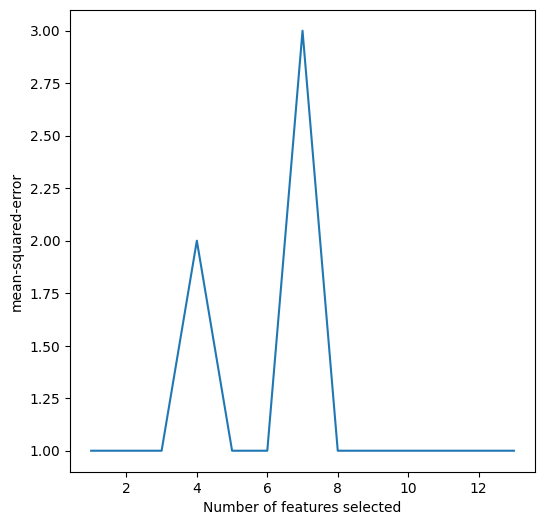

In [ ]:
# plot number of features VS. cross-validation scores
plt.figure(figsize=(6, 6))
plt.xlabel("Number of features selected")
plt.ylabel("mean-squared-error")
plt.plot(range(1, len(rfecv.ranking_) + 1), rfecv.ranking_)

In [ ]:
list(np.array(rfecv.support_))

[True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True]

In [ ]:
np.array(rfecv.support_)

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [ ]:
X_train_new = X_train.loc[:,list(np.array(rfecv.support_))]

In [ ]:
X_train_new.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio',
       'black', 'lstat'],
      dtype='object')

In [ ]:
rfecv.support_

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [ ]:
# %% fit model с выбранными функциями
#%% fit model with selected features X_train_new = X_train[:,rfecv.support_]
#X_train_new = X_train[:,list(rfecv.support_)]
lm2 = LinearRegression()
lm2.fit(X_train_new, y_train)

LinearRegression()

In [ ]:
predicted = lm2.predict(X_train_new)

rmse = np.sqrt(np.mean((predicted-y_train)**2))
print("Root Mean Squared Error: {0:0.4f}" .format(rmse))

Root Mean Squared Error: 4.5562


In [ ]:
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))

The R-squared value is: 0.7550 



In [ ]:
feature_cols_selected = list(np.array(X.columns)[rfecv.support_])
# print intercept and coefficients
param_df = pd.DataFrame({"Features": ['intercept'] + feature_cols_selected ,
"Coef": [lm2.intercept_] + list(lm2.coef_)})

cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   31.708771  intercept
1   -0.100872       crim
2    0.047898         zn
3    0.071585      indus
4  -15.085850        nox
5    4.341769         rm
6   -1.363203        dis
7    0.293597        rad
8   -0.013331        tax
9   -0.924808    ptratio
10   0.007518      black
11  -0.545825      lstat


In [ ]:
# %% проверить производительность по тестовым данным
#%% check performance on test data
#X_test_part = X_test[:,rfecv.support_]
X_test_part = X_test.loc[:,list(np.array(rfecv.support_))]
predicted = lm2.predict(X_test_part)

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
# print metrics on test data
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.7550 

Mean Absolute Error: 3.702275
Root Mean Squared Error: 5.422169
Relative Absolute Error: 0.534729
Relative Squared Error: 0.355347


#Ridge regression and classification

In [ ]:
from sklearn import linear_model
Ridge = linear_model.Ridge(alpha=8)

In [ ]:
Ridge.fit(X_train, y_train)

Ridge(alpha=8)

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(Ridge.score(X_train, y_train)))

The R-squared value is: 0.7492 



In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(X_train.columns),
"Coef": [Ridge.intercept_] + list(Ridge.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   24.007972  intercept
1   -0.093555       crim
2    0.049190         zn
3    0.011042      indus
4    0.751212       chas
5   -2.080868        nox
6    4.222299         rm
7   -0.011845        age
8   -1.172661        dis
9    0.257043        rad
10  -0.014045        tax
11  -0.770814    ptratio
12   0.007706      black
13  -0.573424      lstat


In [ ]:
predicted_Ridge = Ridge.predict(X_test)

In [ ]:
mae = np.mean(abs(predicted_Ridge-y_test))
rmse = np.sqrt(np.mean((predicted_Ridge-y_test)**2))
rae = np.mean(abs(predicted_Ridge-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Ridge-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("The R-squared value is: {0:0.4f}".format(Ridge.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6401
Mean Absolute Error: 3.731434
Root Mean Squared Error: 5.456830
Relative Absolute Error: 0.538941
Relative Squared Error: 0.359905


##Lasso

In [ ]:
Lasso = linear_model.Lasso(alpha=0.9)
Lasso.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(Lasso.score(X_train, y_train)))
param_df = pd.DataFrame({"Features": ['intercept'] + list(X_train.columns),
"Coef": [Lasso.intercept_] + list(Lasso.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

The R-squared value is: 0.7142 

         Coef   Features
0   35.229669  intercept
1   -0.056151       crim
2    0.046030         zn
3   -0.000000      indus
4    0.000000       chas
5   -0.000000        nox
6    1.877814         rm
7    0.014619        age
8   -0.708839        dis
9    0.223048        rad
10  -0.014079        tax
11  -0.667406    ptratio
12   0.005590      black
13  -0.727786      lstat


In [ ]:
predicted_Lasso = Lasso.predict(X_test)
mae = np.mean(abs(predicted_Lasso-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_Lasso-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Lasso-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(Lasso.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6315
Mean Absolute Error: 3.946239
Root Mean Squared Error: 5.521872
Relative Absolute Error: 0.569966
Relative Squared Error: 0.368536


##ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=5, l1_ratio = 0.3, random_state=42)
ElasticNetCV.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(ElasticNetCV.score(X_train, y_train)))
param_df = pd.DataFrame({"Features": ['intercept'] + list(X_train.columns),
"Coef": [ElasticNetCV.intercept_] + list(ElasticNetCV.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

The R-squared value is: 0.6637 

         Coef   Features
0   41.586958  intercept
1   -0.053627       crim
2    0.049410         zn
3   -0.000000      indus
4    0.000000       chas
5   -0.000000        nox
6    0.389496         rm
7    0.033486        age
8   -0.421953        dis
9    0.236516        rad
10  -0.015781        tax
11  -0.540040    ptratio
12   0.004498      black
13  -0.793024      lstat


In [ ]:
predicted_ElasticNetCV = ElasticNetCV.predict(X_test)
mae = np.mean(abs(predicted_ElasticNetCV-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_ElasticNetCV-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_ElasticNetCV-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(ElasticNetCV.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6111
Mean Absolute Error: 4.105369
Root Mean Squared Error: 5.521872
Relative Absolute Error: 0.592949
Relative Squared Error: 0.388946


#SGD (стохастический градиентный спуск)

In [ ]:
#import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
SGD = SGDRegressor(loss="squared_error", penalty="elasticnet", alpha=0.01,
                       l1_ratio=0.4, fit_intercept=True, max_iter=100000, tol=0.01, shuffle=True, verbose=0, random_state=None, learning_rate="invscaling",
                       eta0=0.001, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)

In [ ]:
# приведение данных к нормальному закону расределения:
#стандартизация признаков, вычитая среднее значение и масштабируя до единичной дисперсии z = (x-u)/s

SGD_StandardScaler = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
SGD_StandardScaler.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(X_train.columns),
"Coef": [SGD_StandardScaler[1].intercept_[0]] + list(SGD_StandardScaler[1].coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1] # переместить последний элемент на первую позицию (поменять местами столбцы)
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   22.386455  intercept
1   -0.793789       crim
2    0.906723         zn
3    0.077318      indus
4    0.336690       chas
5   -1.460565        nox
6    3.166363         rm
7   -0.121542        age
8   -2.698470        dis
9    1.509805        rad
10  -1.124502        tax
11  -1.892436    ptratio
12   0.675728      black
13  -3.810432      lstat


In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(SGD_StandardScaler.score(X_train, y_train)))

The R-squared value is: 0.7539 



In [117]:
predicted_SGD_StandardScaler = SGD_StandardScaler.predict(X_test)
mae = np.mean(abs(predicted_SGD_StandardScaler-y_test))
rmse = np.sqrt(np.mean((predicted_SGD_StandardScaler-y_test)**2))
rae = np.mean(abs(predicted_SGD_StandardScaler-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_SGD_StandardScaler-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(SGD_StandardScaler.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6548
Mean Absolute Error: 3.624330
Root Mean Squared Error: 5.344139
Relative Absolute Error: 0.523471
Relative Squared Error: 0.345193


**MinMaxScaler**

In [ ]:
# используем промасштабируемые данные MinMaxScaler: scaled_minmadf
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
# - Это преобразование часто используется как альтернатива масштабированию с нулевым средним значением (мат. ожиданием) и единичной дисперсией (стандратным отклонением).

#SGD_minmadf = SGD.fit(scaled_minmadf, y_train)

вектор весовых коэффициентов модели

In [ ]:
#SGD_minmadf.coef_

свободный коэффициент; то, чему равна
зависимая переменная, если предиктор равен нулю

In [ ]:
#SGD_minmadf.intercept_

In [ ]:
#print("intercept=", SGD_minmadf.intercept_)
#print("coef=", SGD_minmadf.coef_)

In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
SGD_MinMaxScaler = make_pipeline(MinMaxScaler(),
                    SGDRegressor(max_iter=100000, tol=1e-4))
SGD_MinMaxScaler.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sgdregressor', SGDRegressor(max_iter=100000, tol=0.0001))])

In [120]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(X_train.columns),
"Coef": [SGD_MinMaxScaler[1].intercept_[0]] + list(SGD_MinMaxScaler[1].coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1] # переместить последний элемент на первую позицию (поменять местами столбцы)
param_df = param_df[cols]
print(param_df)

         Coef   Features
0   16.253318  intercept
1   -4.017054       crim
2    3.062845         zn
3    0.220365      indus
4    1.530743       chas
5   -2.230728        nox
6   25.022058         rm
7    1.046658        age
8   -6.139998        dis
9    3.868676        rad
10  -4.150548        tax
11  -7.538739    ptratio
12   5.023881      black
13 -17.220719      lstat


In [121]:
predicted_SGD_MinMaxScaler = SGD_MinMaxScaler.predict(X_test)
mae = np.mean(abs(predicted_SGD_MinMaxScaler-y_test))
rmse = np.sqrt(np.mean((predicted_SGD_MinMaxScaler-y_test)**2))
rae = np.mean(abs(predicted_SGD_MinMaxScaler-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_SGD_MinMaxScaler-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(SGD_MinMaxScaler.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6437
Mean Absolute Error: 3.614408
Root Mean Squared Error: 5.429113
Relative Absolute Error: 0.522038
Relative Squared Error: 0.356258


#Дерево решений

In [136]:
!pip install -q dtreeviz
import dtreeviz
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [135]:
len(boston)

506

In [137]:
np.random.randint(0, len(boston))

217

In [142]:
X.values[np.random.randint(0, len(boston)),:]

array([4.2970e-02, 5.2500e+01, 5.3200e+00, 0.0000e+00, 4.0500e-01,
       6.5650e+00, 2.2900e+01, 7.3172e+00, 6.0000e+00, 2.9300e+02,
       1.6600e+01, 3.7172e+02, 9.5100e+00])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=4, min_samples_split=30, min_samples_leaf=30)
regr.fit(X_train, y_train)


#X = boston_dataset.data[np.random.randint(0, len(boston_dataset.data)),:]
X.values[np.random.randint(0, len(boston)),:]



In [143]:
viz = dtreeviz.model(regr, X_train=X_train, y_train=y_train,
               #X_train,
               #y_train,
               target_name='medv',  # this name will be displayed at the leaf node
               feature_names=X_train.columns,
               #X=X,
               #show_node_labels = True
              )

In [144]:
v = viz.view()     # render as SVG into internal object
v.show()                 # pop up window

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, feature_names=X.columns)

TypeError: ignored

In [ ]:
tree = tree.export_graphviz(regr)
graph = graphviz.Source(tree)
graph

#Bagging

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
Bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                           n_estimators=7,
                           max_features=0.8,
                           bootstrap_features=False,
                           random_state=123).fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(Bagging.score(X_train, y_train)))

In [ ]:
Bagging.estimators_

In [ ]:
Bagging.estimators_features_

In [ ]:
predicted_Bagging = Bagging.predict(X_test)
mae = np.mean(abs(predicted_Bagging-y_test))
rmse = np.sqrt(np.mean((predicted_Bagging-y_test)**2))
rae = np.mean(abs(predicted_Bagging-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Bagging-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(Bagging.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

# Случайный лес

In [ ]:
from sklearn.metrics import r2_score
#Random forest
# =============================================================================
from sklearn.ensemble import RandomForestRegressor

# Fit and predict
rf = RandomForestRegressor(n_estimators=7, random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('R2 score on testing data: {:.2f}%'.format(100*r2_score(y_test, y_pred)))

# Feature selection
feat_imp = rf.feature_importances_


plt.figure(figsize=(6 * 1.618, 6))
feature_names=boston_dataset.feature_names
index = np.arange(len(feature_names))
bar_width = 0.5
plt.bar(index, feat_imp, color='black', alpha=0.5)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, np.array(feature_names))
plt.tight_layout()
plt.show()
# =============================================================================
#

#Бустинг

##AdaBoost

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
AdaBoost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=6, random_state=123)
AdaBoost.fit(X_train, y_train)

In [ ]:
predicted_AdaBoost = AdaBoost.predict(X_test)
print('R2 score on testing data: {:.2f}'.format(r2_score(y_test, predicted_AdaBoost)))
rmse = np.sqrt(mean_squared_error(y_test, predicted_AdaBoost))
print("RMSE: %f" % (rmse))

# Градиентный бустинг

In [ ]:
#Gradient Boosting Machines
# =============================================================================
import xgboost as xgb
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor
import time

XGBR = XGBRegressor(n_estimators = 7, random_state=1234)
XGBR.fit(X_train, y_train)


# Initialize instances of GBM models
gbm_models = [GradientBoostingRegressor(n_estimators = 10, random_state=1234),
              LGBMRegressor(n_estimators = 10, random_state=1234),
              HistGradientBoostingRegressor(max_iter=10, random_state=1234)]

# Loop over models
for gbm in gbm_models:
    # Measure time
    start_time = time.time()
    # Fit and predict
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    # Print info
    print('Model: {} \n R2 score on testing data: {:.2f}% \n Execution time: {:.2}sec'.format(
          gbm.__class__.__name__, 100*r2_score(y_test, y_pred), time.time()-start_time))

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.


Model: GradientBoostingRegressor 
 R2 score on testing data: 69.87% 
 Execution time: 0.022sec
Model: LGBMRegressor 
 R2 score on testing data: 63.64% 
 Execution time: 0.05sec
Model: HistGradientBoostingRegressor 
 R2 score on testing data: 63.62% 
 Execution time: 0.053sec


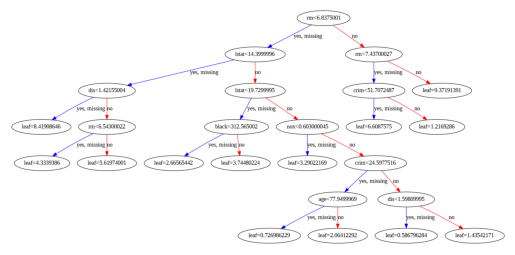

In [ ]:
# plot decision tree
from xgboost import XGBRegressor
from xgboost import plot_tree
import matplotlib.pyplot as plt
# plot single tree
plot_tree(XGBR, num_trees=1)
plt.rcParams['figure.figsize'] = [50, 20]
plt.show()

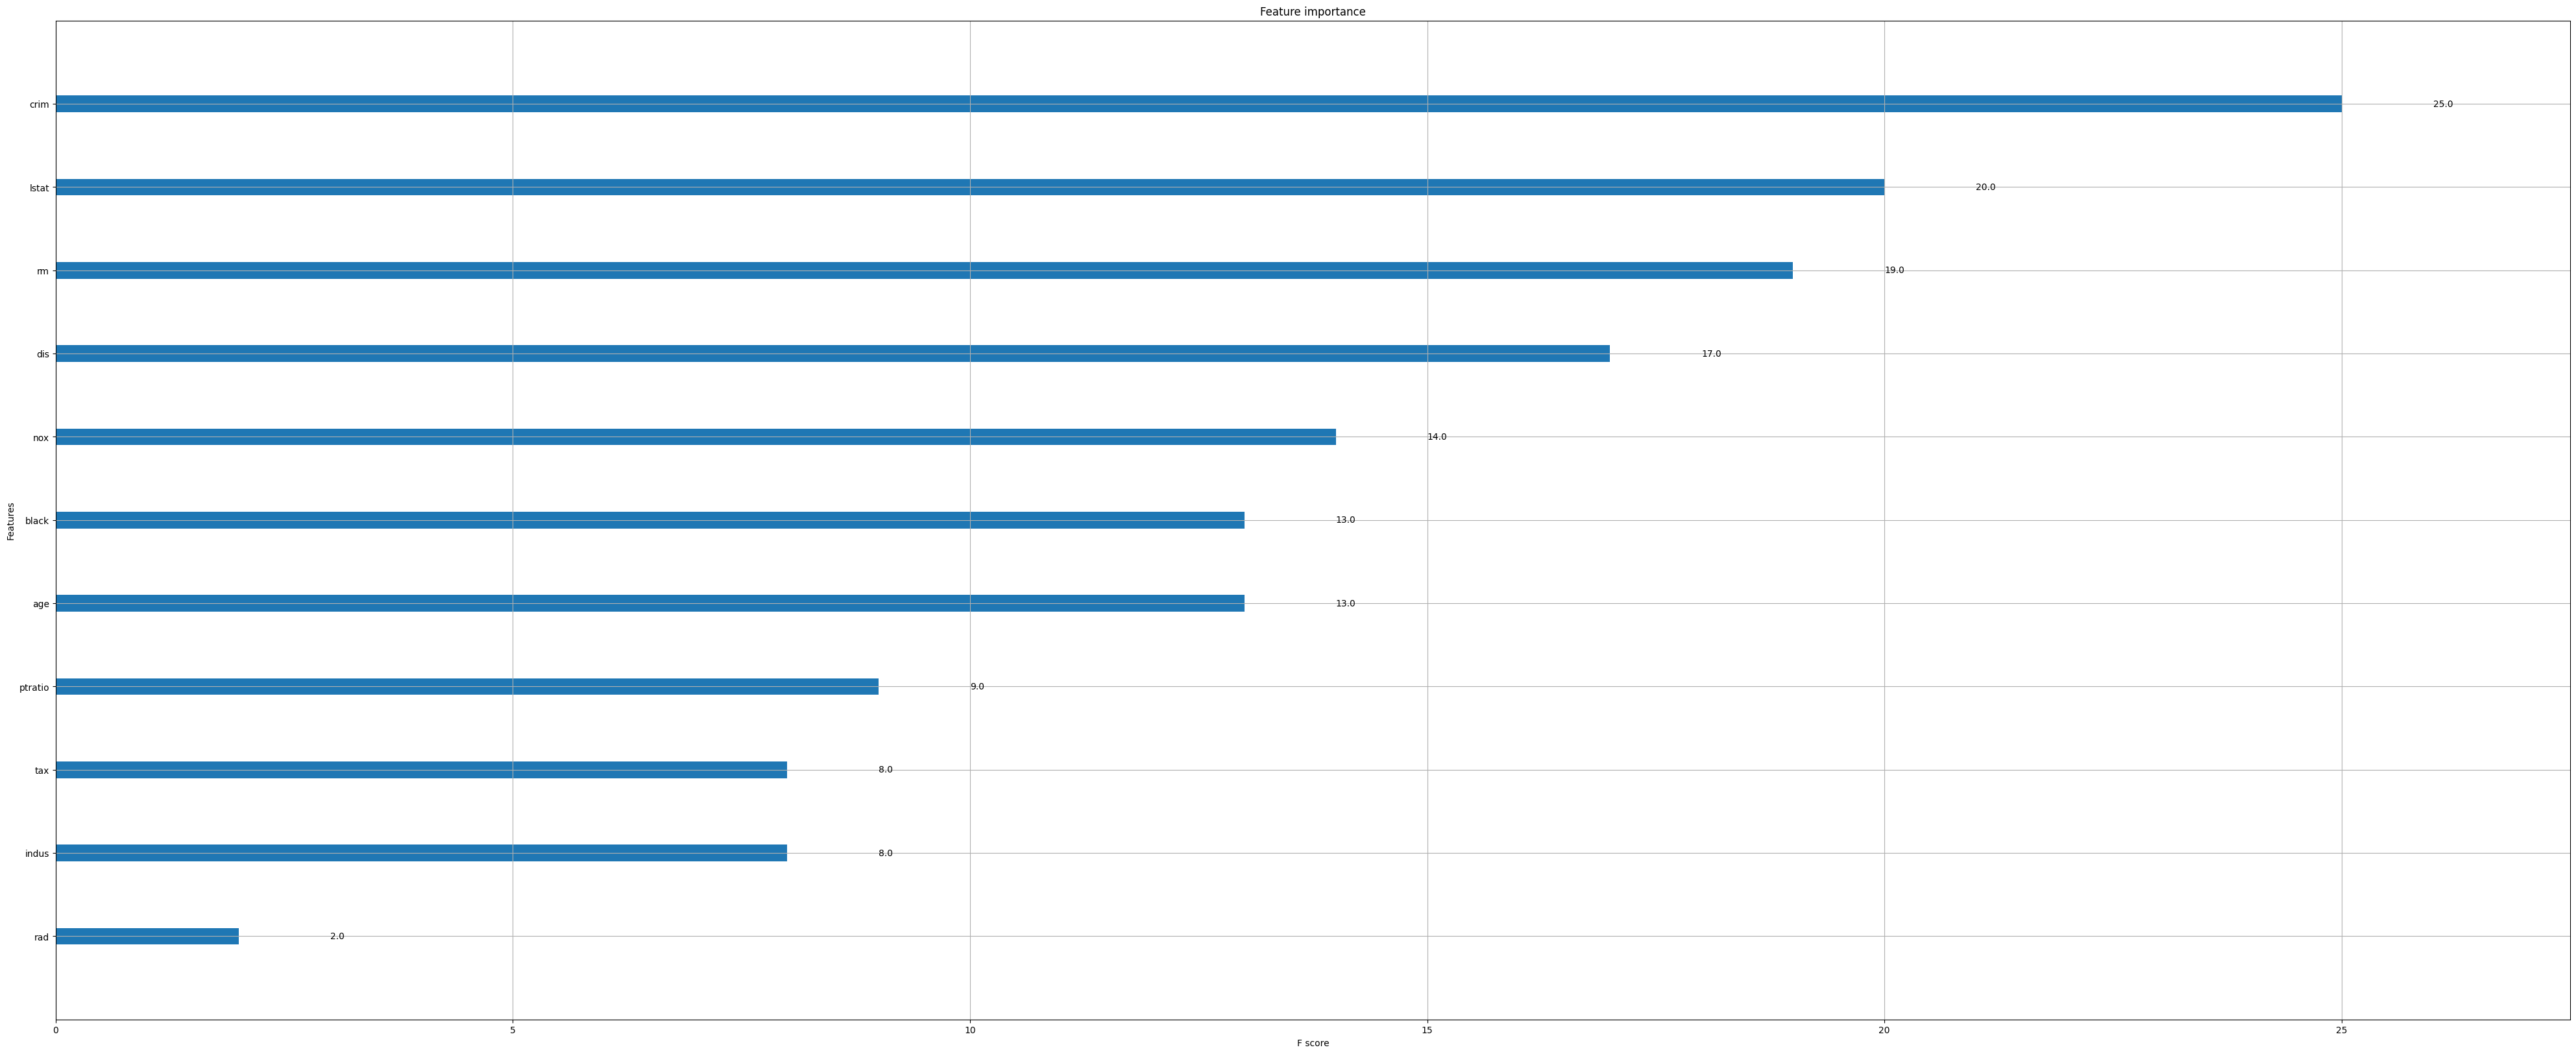

In [ ]:
xgb.plot_importance(XGBR)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()